In [22]:
import sys
sys.path.append('../')

import numpy as np
from qiskit import IBMQ, Aer
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel

In [23]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

ibmqfactory.load_account:WARNING:2022-08-09 14:14:31,190: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
backend = provider.get_backend('ibm_nairobi')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)

In [25]:
parall_qubits = [ [ (0,1), (3,5) ],
                    [ (0,1) ],
                    [ (3,5) ]
                ]

In [26]:
qndmt = device_process_measurement_tomography( backend, parall_qubits=parall_qubits )

1054


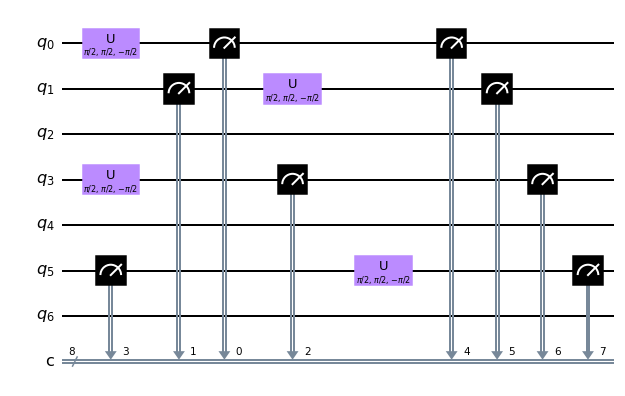

In [27]:
circuits_qndmt = qndmt.circuits()
print( len(circuits_qndmt) )
circuits_qndmt[300].draw(output='mpl')

In [28]:
# job_manager = IBMQJobManager()
# job = job_manager.run( transpile( circuits_qndmt, backend ) , backend=backend, shots=2**13 )
# job.statuses() 

In [29]:
# job_id = job.job_set_id()
# job_id 

In [30]:
# job = job_manager.retrieve_job_set( job_id, provider )

In [31]:
# results = job.results().combine_results()

In [32]:
job = simulator.run( circuits_qndmt, noise_model=noise_model, shots=2**13  )
results = job.result()

In [33]:
choi_single, choi_double, gateset  = qndmt.fit( results, paralell=True, gate_set=True ) 

In [34]:
num_qubits    = qndmt._num_qubits
parall_qubits = qndmt._parall_qubits

print( num_qubits )
print( parall_qubits )

7
[[(0, 1), (3, 5)], [(0, 1)], [(3, 5)]]


In [35]:
quantities = []
for k in range(num_qubits):
    quantities.append( Quantities( choi_single[k][0], choi_single[k][1] ) )

quantities_2 = []
cros_quantities = []
for i in range(len(parall_qubits)):
    for j in range(len(parall_qubits[i])):
        k = parall_qubits[i][j][0]
        l = parall_qubits[i][j][1]
        cros_quantities.append( Cross_Quantities( choi_single[k][0], choi_single[k][1],
                                                  choi_single[l][0], choi_single[l][1],
                                                  choi_double[i][j][0], choi_double[i][j][1]
                                                )  )
        quantities_2.append( Quantities( choi_double[i][j][0], choi_double[i][j][1] ) )

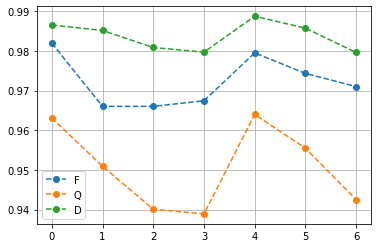

In [36]:
plt.plot( quantities, '--o' )
plt.grid()
plt.legend( ['F','Q', 'D'] )

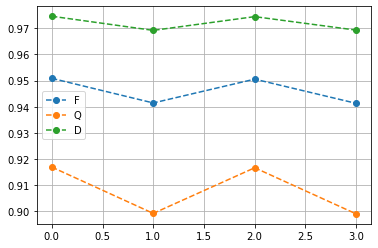

In [37]:
plt.plot( quantities_2, '--o' )
plt.grid()
plt.legend( ['F','Q', 'D'] )

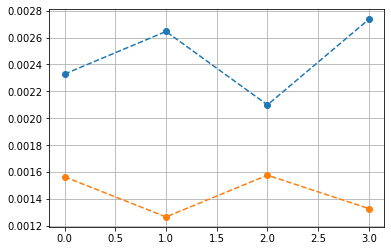

In [38]:
plt.plot( cros_quantities, '--o' )
plt.grid()